# Business Problem 
It is important to understand our main objective which is to develop a model that can assess the sentiment of tweets solely based on their content. To address this, we’re using a dataset from CrowdFlower, which includes more than 9,000 tweets about Apple and Google products. These tweets have been labeled by human raters as positive, negative, or neutral, providing a foundation for a Natural Language Processing (NLP) approach to classify sentiment accurately.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, cohen_kappa_score, matthews_corrcoef
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import collections
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import ast

In [2]:
df = pd.read_csv('clean_df.csv')
df.head()

,Original Tweet,Product,Emotion,Brand,Clean Tweet,Character Count of Original Tweet,Hashtag,Hashtag Count,Character Count of Clean Tweet,Clean Tokens,Clean Token Count
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,i have a g iphone after hrs tweeting at risea...,127,"['#RISE_Austin', '#SXSW']",2,127,"['i', 'have', 'g', 'iphone', 'after', 'hrs', '...",16
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,know about awesome ipadiphone app that youll ...,139,['#SXSW'],1,139,"['know', 'about', 'awesome', 'ipadiphone', 'ap...",15
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,can not wait for ipad also they should sale t...,79,"['#iPad', '#SXSW']",2,79,"['can', 'not', 'wait', 'ipad', 'also', 'they',...",11
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,i hope this years festival isnt as crashy as ...,82,['#sxsw'],1,82,"['i', 'hope', 'years', 'festival', 'isnt', 'as...",12
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,great stuff on fri sxsw marissa mayer google ...,131,['#SXSW'],1,131,"['great', 'stuff', 'fri', 'sxsw', 'marissa', '...",14


In [3]:
X = df['Clean Tokens']
y = df['Emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                    random_state = 43, stratify = df['Emotion'])

display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(6802,)

(6802,)

(2268,)

(2268,)

Okay so now we are going to clean 2 of our models:
* Logistic Regression with Count Vectorizer
* Multinomial Naive Bayes with Count Vectorizer

Let's start with Multinomial Naive Bayes with Count Vectorizer

## Tuning Multinomial Naive Bayes with Count Vectorizer

### Model 1 = Alpha = 0.001

In [4]:
def passing_final(passing_final):
    return passing_final

le = LabelEncoder()

y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

T21MNBpipelineCV = Pipeline([
    ('BOW', CountVectorizer(preprocessor = passing_final, tokenizer = passing_final)), 
    ('Classifier', MultinomialNB(alpha = 0.001)), 
]) 

T21MNBpipelineCV.fit(X_train, y_train_enc)

Pipeline(steps=[('BOW',
                 CountVectorizer(preprocessor=<function passing_final at 0x15e397f60>,
                                 tokenizer=<function passing_final at 0x15e397f60>)),
                ('Classifier', MultinomialNB(alpha=0.001))])

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       427
     Neutral       0.63      0.89      0.73      4148
    Positive       0.43      0.18      0.25      2227

    accuracy                           0.60      6802
   macro avg       0.35      0.35      0.33      6802
weighted avg       0.52      0.60      0.53      6802



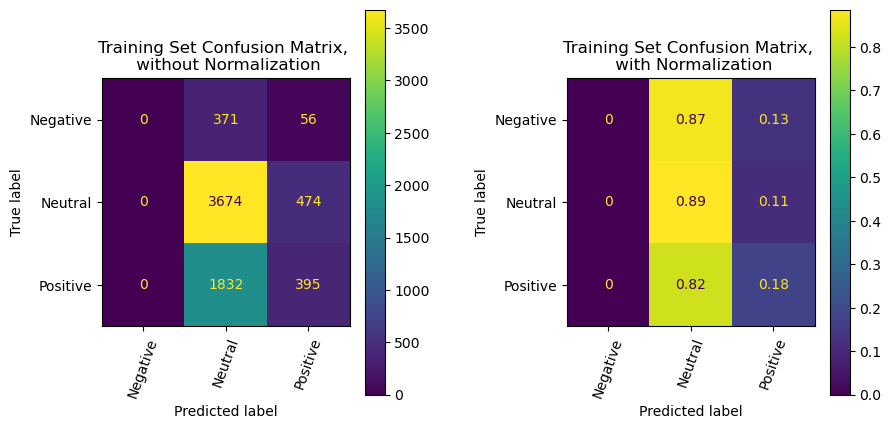

Training Accuracy: 59.82%

Cohen's Kappa Score for Training Set:
0.063

Matthew's Correlation Coefficient for Training Set:
0.077


In [5]:
def confmat_and_classrep(estimator, X, y, labels, set_name):
    predictions = estimator.predict(X)
    print(f'Classification Report for {set_name} Set')
    print(classification_report(y, predictions, target_names=labels)) 
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    matrix = ConfusionMatrixDisplay.from_estimator(
        estimator, X, y, display_labels=labels, cmap=plt.cm.viridis, 
        xticks_rotation=70, values_format='d', ax=axes[0]
    )
    matrix.ax_.set_title(f'{set_name} Set Confusion Matrix, \n without Normalization')
    matrix = ConfusionMatrixDisplay.from_estimator(
        estimator, X, y, display_labels=labels, cmap=plt.cm.viridis, 
        xticks_rotation=70, normalize='true', ax=axes[1]
    )
    matrix.ax_.set_title(f'{set_name} Set Confusion Matrix, \n with Normalization')
    plt.subplots_adjust(wspace=0.5) 
    plt.show()
    print(f'{set_name} Accuracy: {estimator.score(X, y):.2%}')
    print('')
    print(f"Cohen's Kappa Score for {set_name} Set:")
    print(round(cohen_kappa_score(y, predictions), 3))
    print('')
    print(f"Matthew's Correlation Coefficient for {set_name} Set:")
    print(round(matthews_corrcoef(y, predictions), 3))

confmat_and_classrep(T21MNBpipelineCV, X_train, y_train_enc, le.classes_, 'Training')

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       142
     Neutral       0.62      0.87      0.72      1383
    Positive       0.39      0.18      0.24       743

    accuracy                           0.59      2268
   macro avg       0.34      0.35      0.32      2268
weighted avg       0.51      0.59      0.52      2268



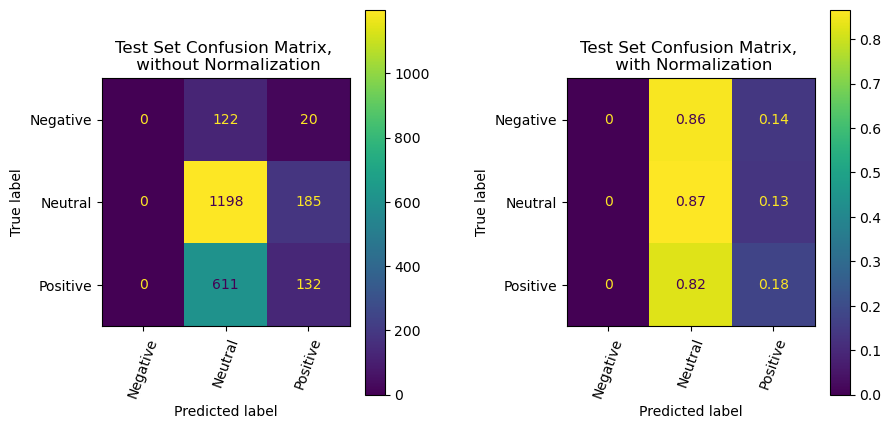

Test Accuracy: 58.64%

Cohen's Kappa Score for Test Set:
0.043

Matthew's Correlation Coefficient for Test Set:
0.051


In [6]:
confmat_and_classrep(T21MNBpipelineCV, X_test, y_test_enc, le.classes_, 'Test')

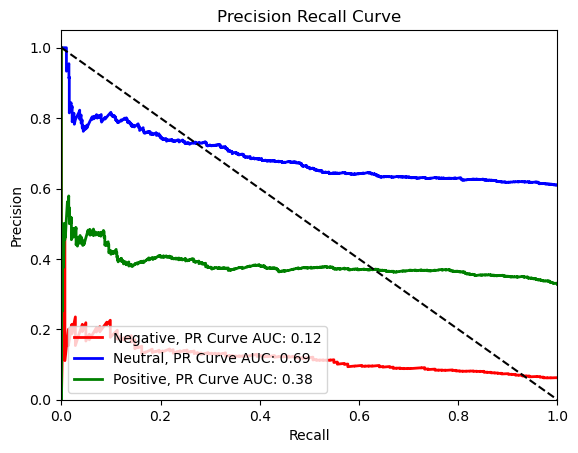

In [7]:
def pr_curves(y_test_multi, y_hat_test_multi, classes):
    precision = dict()
    recall = dict()
    pr_auc = dict() 
    for i in range(3): 
        precision[i], recall[i], _ = precision_recall_curve(y_test_multi[:, i], y_hat_test_multi[:, i])
        pr_auc[i] = auc(recall[i], precision[i]) 
    plt.figure()
    lw = 2
    colors = ['red', 'blue', 'green']
    for i, class_ in enumerate(classes):
        plt.plot(recall[i], precision[i], color = colors[i], lw = lw, 
                 label = f'{classes[i]}, PR Curve AUC: {round(pr_auc[i], 2)}')
    plt.plot([0, 1], [1, 0], 'k--')
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

lb = LabelBinarizer()

lb.fit(y_test_enc)
y_test_multi = lb.transform(y_test_enc) 
y_hat_test_multi = T21MNBpipelineCV.predict_proba(X_test) 

pr_curves(y_test_multi, y_hat_test_multi, le.classes_)

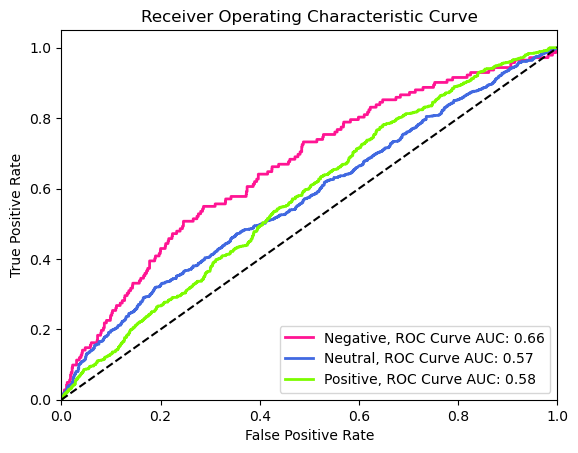

In [8]:
def roc_curves(y_test_multi, y_hat_test_multi, classes):
    fpr = dict() 
    tpr = dict()
    roc_auc = dict() 
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test_multi[:, i], y_hat_test_multi[:, i]) 
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure()
    lw = 2
    colors = ['deeppink', 'royalblue', 'lawngreen']
    for i, class_ in enumerate(classes): 
        plt.plot(fpr[i], tpr[i], color = colors[i], lw = lw, 
                 label = f'{classes[i]}, ROC Curve AUC: {round(roc_auc[i], 2)}') 
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.title('Receiver Operating Characteristic Curve') 
    plt.legend(loc="lower right") 
    plt.show()

roc_curves(y_test_multi, y_hat_test_multi, le.classes_)

### Model 2 - Alpha = 0.01

In [9]:
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test) 

T22MNBpipelineCV = Pipeline([
    ('BOW', CountVectorizer(preprocessor = passing_final, tokenizer = passing_final)), 
    ('Classifier', MultinomialNB(alpha = 0.01)), 
])
T22MNBpipelineCV.fit(X_train, y_train_enc)

Pipeline(steps=[('BOW',
                 CountVectorizer(preprocessor=<function passing_final at 0x15e397f60>,
                                 tokenizer=<function passing_final at 0x15e397f60>)),
                ('Classifier', MultinomialNB(alpha=0.01))])

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       427
     Neutral       0.63      0.89      0.73      4148
    Positive       0.43      0.18      0.25      2227

    accuracy                           0.60      6802
   macro avg       0.35      0.35      0.33      6802
weighted avg       0.52      0.60      0.53      6802



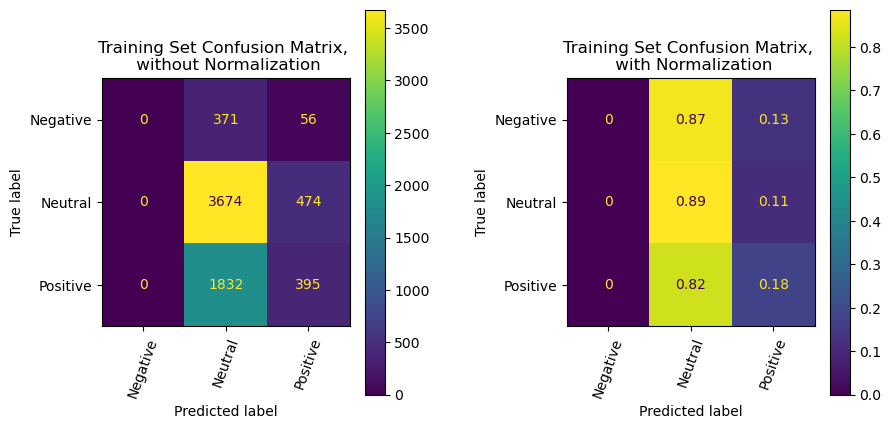

Training Accuracy: 59.82%

Cohen's Kappa Score for Training Set:
0.063

Matthew's Correlation Coefficient for Training Set:
0.077


In [10]:
confmat_and_classrep(T22MNBpipelineCV, X_train, y_train_enc, le.classes_, 'Training') 

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       142
     Neutral       0.62      0.87      0.72      1383
    Positive       0.39      0.18      0.24       743

    accuracy                           0.59      2268
   macro avg       0.34      0.35      0.32      2268
weighted avg       0.51      0.59      0.52      2268



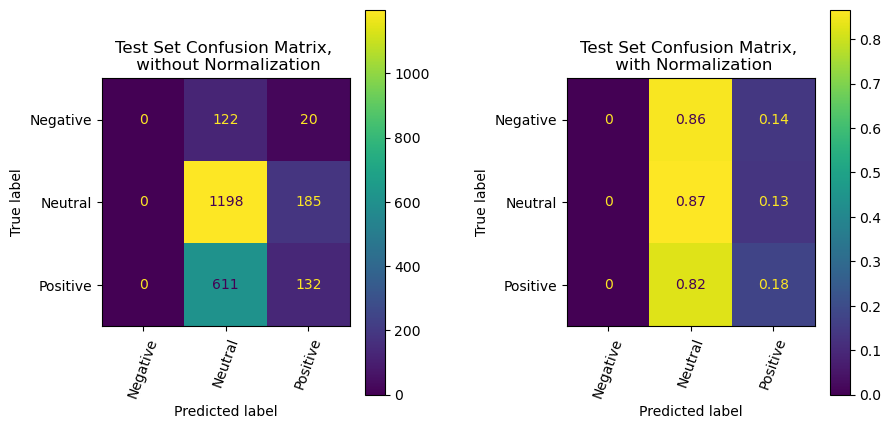

Test Accuracy: 58.64%

Cohen's Kappa Score for Test Set:
0.043

Matthew's Correlation Coefficient for Test Set:
0.051


In [11]:
confmat_and_classrep(T22MNBpipelineCV, X_test, y_test_enc, le.classes_, 'Test') 

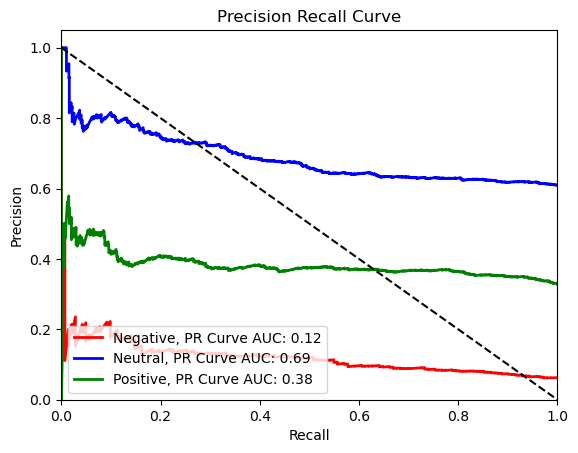

In [12]:
lb.fit(y_test_enc)
y_test_multi = lb.transform(y_test_enc)
y_hat_test_multi = T22MNBpipelineCV.predict_proba(X_test)
pr_curves(y_test_multi, y_hat_test_multi, le.classes_) 

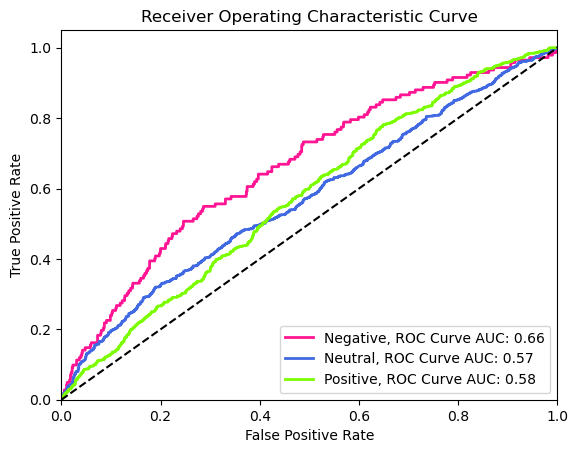

In [13]:
roc_curves(y_test_multi, y_hat_test_multi, le.classes_) 

### Model 3 = Alpha = 0.1

In [14]:
y_train_enc = le.fit_transform(y_train) 
y_test_enc = le.transform(y_test)

T23MNBpipelineCV = Pipeline([
    ('BOW', CountVectorizer(preprocessor = passing_final, tokenizer = passing_final)), 
    ('Classifier', MultinomialNB(alpha = 0.1)), 
]) 
T23MNBpipelineCV.fit(X_train, y_train_enc)

Pipeline(steps=[('BOW',
                 CountVectorizer(preprocessor=<function passing_final at 0x15e397f60>,
                                 tokenizer=<function passing_final at 0x15e397f60>)),
                ('Classifier', MultinomialNB(alpha=0.1))])

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       427
     Neutral       0.63      0.89      0.73      4148
    Positive       0.43      0.18      0.25      2227

    accuracy                           0.60      6802
   macro avg       0.35      0.35      0.33      6802
weighted avg       0.52      0.60      0.53      6802



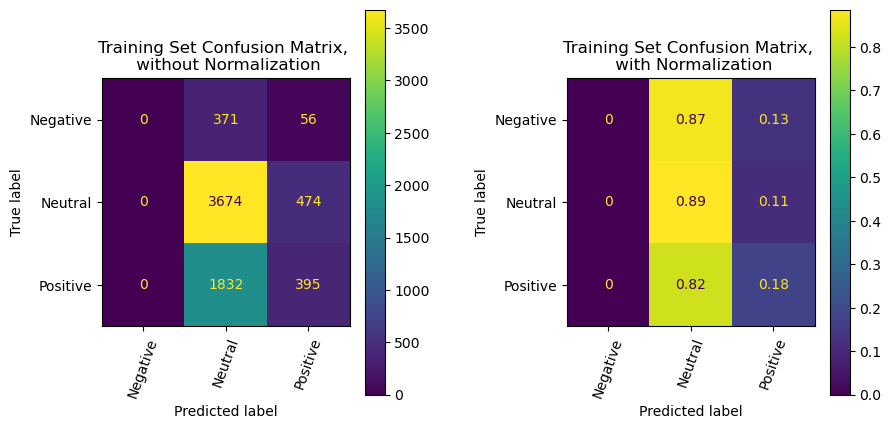

Training Accuracy: 59.82%

Cohen's Kappa Score for Training Set:
0.063

Matthew's Correlation Coefficient for Training Set:
0.077


In [15]:
confmat_and_classrep(T23MNBpipelineCV, X_train, y_train_enc, le.classes_, 'Training')

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       142
     Neutral       0.62      0.87      0.72      1383
    Positive       0.39      0.18      0.24       743

    accuracy                           0.59      2268
   macro avg       0.34      0.35      0.32      2268
weighted avg       0.51      0.59      0.52      2268



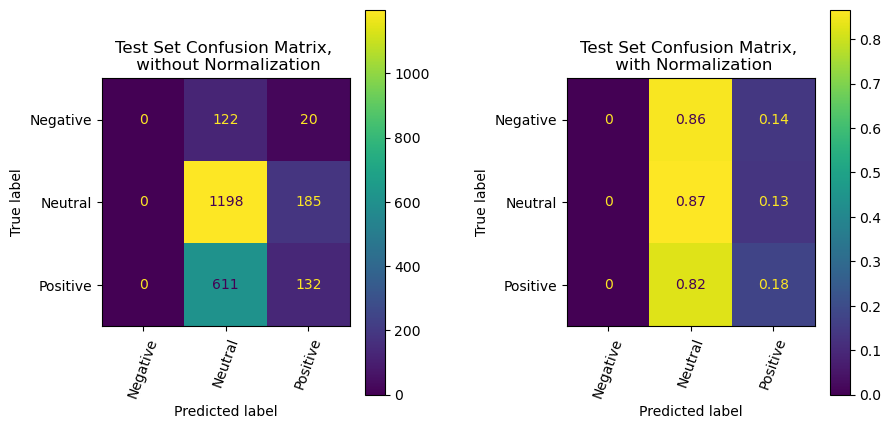

Test Accuracy: 58.64%

Cohen's Kappa Score for Test Set:
0.043

Matthew's Correlation Coefficient for Test Set:
0.051


In [16]:
confmat_and_classrep(T23MNBpipelineCV, X_test, y_test_enc, le.classes_, 'Test') 

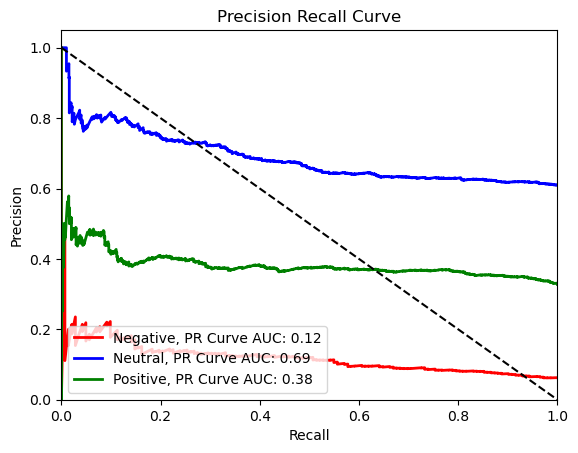

In [17]:
lb.fit(y_test_enc)
y_test_multi = lb.transform(y_test_enc) 
y_hat_test_multi = T23MNBpipelineCV.predict_proba(X_test) 
pr_curves(y_test_multi, y_hat_test_multi, le.classes_)

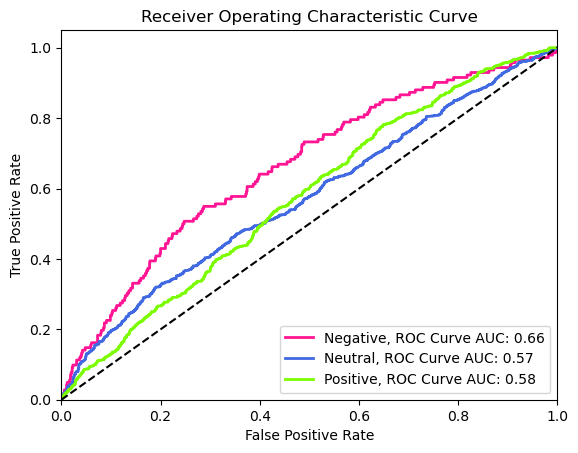

In [18]:
roc_curves(y_test_multi, y_hat_test_multi, le.classes_) 

## Tuning Logistic Regression with Count Vectorizer

### Model 4 = Class Weight = Balanced

In [19]:
y_train_enc = le.fit_transform(y_train) 
y_test_enc = le.transform(y_test)

T1LRpipelineCV = Pipeline([
    ('BOW', CountVectorizer(preprocessor = passing_final, tokenizer = passing_final)), 
    ('Classifier', LogisticRegression(class_weight = 'balanced')), 
]) 

T1LRpipelineCV.fit(X_train, y_train_enc) 

Pipeline(steps=[('BOW',
                 CountVectorizer(preprocessor=<function passing_final at 0x15e397f60>,
                                 tokenizer=<function passing_final at 0x15e397f60>)),
                ('Classifier', LogisticRegression(class_weight='balanced'))])

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.11      0.53      0.19       427
     Neutral       0.71      0.49      0.58      4148
    Positive       0.41      0.36      0.39      2227

    accuracy                           0.45      6802
   macro avg       0.41      0.46      0.38      6802
weighted avg       0.58      0.45      0.49      6802



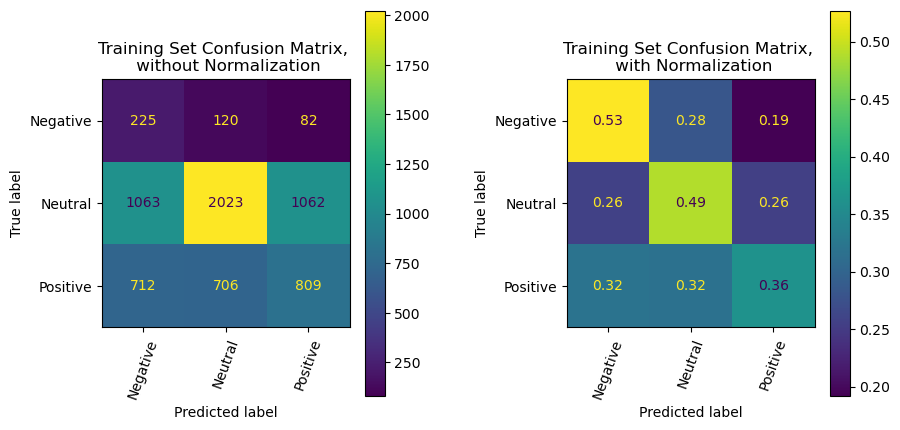

Training Accuracy: 44.94%

Cohen's Kappa Score for Training Set:
0.129

Matthew's Correlation Coefficient for Training Set:
0.14


In [20]:
confmat_and_classrep(T1LRpipelineCV, X_train, y_train_enc, le.classes_, 'Training')

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.11      0.49      0.17       142
     Neutral       0.69      0.46      0.55      1383
    Positive       0.41      0.38      0.40       743

    accuracy                           0.43      2268
   macro avg       0.40      0.44      0.37      2268
weighted avg       0.56      0.43      0.48      2268



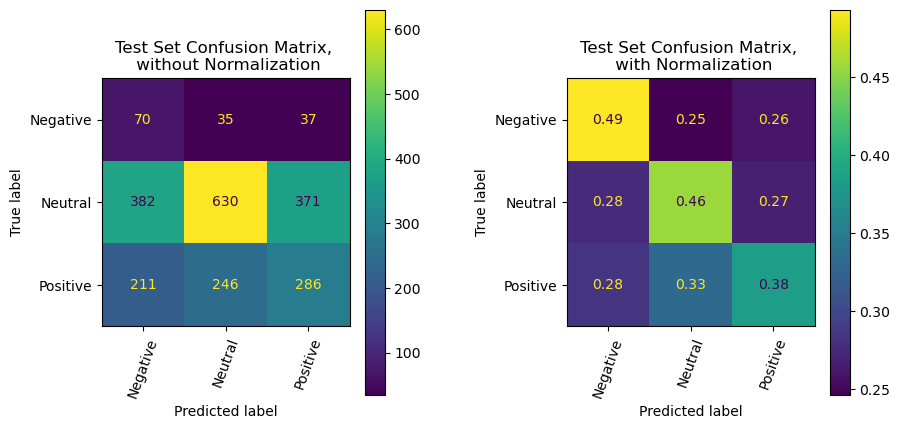

Test Accuracy: 43.47%

Cohen's Kappa Score for Test Set:
0.112

Matthew's Correlation Coefficient for Test Set:
0.122


In [21]:
confmat_and_classrep(T1LRpipelineCV, X_test, y_test_enc, le.classes_, 'Test') 

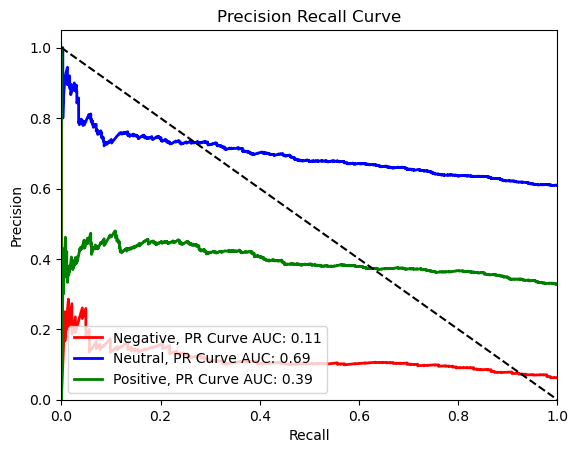

In [22]:
lb.fit(y_test_enc) 
y_test_multi = lb.transform(y_test_enc) 
y_hat_test_multi = T1LRpipelineCV.predict_proba(X_test) 

pr_curves(y_test_multi, y_hat_test_multi, le.classes_)

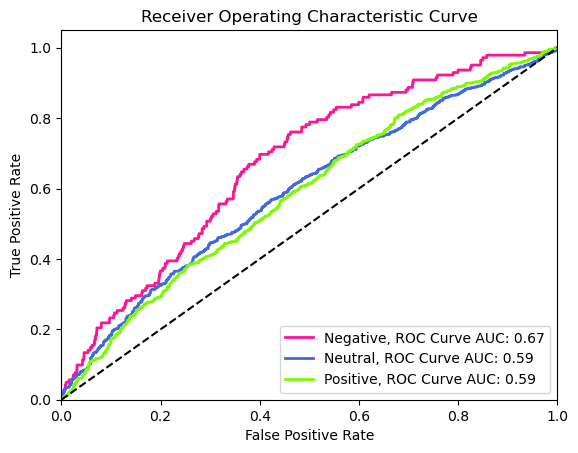

In [23]:
roc_curves(y_test_multi, y_hat_test_multi, le.classes_) 

### Model 5 - C = 0.5

In [24]:
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test) 

T3LRpipelineCV = Pipeline([
    ('BOW', CountVectorizer(preprocessor = passing_final, tokenizer = passing_final)), 
    ('Classifier', LogisticRegression(C = 0.5)), 
]) 

T3LRpipelineCV.fit(X_train, y_train_enc)

Pipeline(steps=[('BOW',
                 CountVectorizer(preprocessor=<function passing_final at 0x15e397f60>,
                                 tokenizer=<function passing_final at 0x15e397f60>)),
                ('Classifier', LogisticRegression(C=0.5))])

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       1.00      0.00      0.00       427
     Neutral       0.62      0.93      0.75      4148
    Positive       0.43      0.11      0.18      2227

    accuracy                           0.61      6802
   macro avg       0.69      0.35      0.31      6802
weighted avg       0.58      0.61      0.52      6802



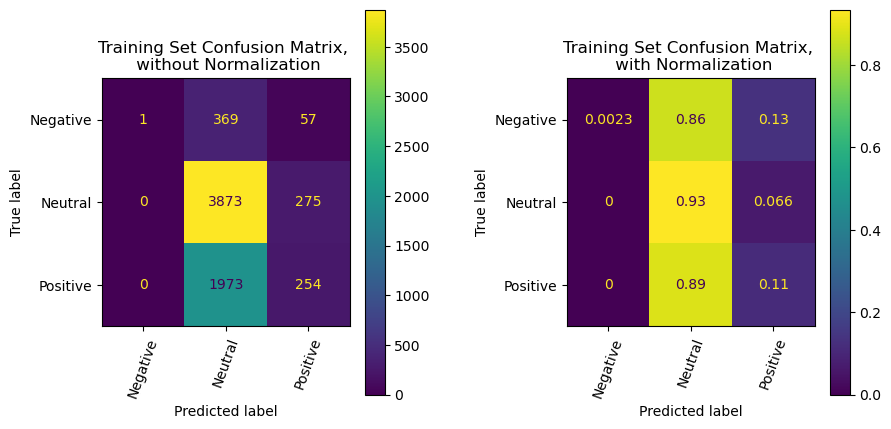

Training Accuracy: 60.69%

Cohen's Kappa Score for Training Set:
0.052

Matthew's Correlation Coefficient for Training Set:
0.075


In [25]:
confmat_and_classrep(T3LRpipelineCV, X_train, y_train_enc, le.classes_, 'Training') 

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       142
     Neutral       0.62      0.93      0.74      1383
    Positive       0.42      0.11      0.18       743

    accuracy                           0.60      2268
   macro avg       0.35      0.35      0.31      2268
weighted avg       0.52      0.60      0.51      2268



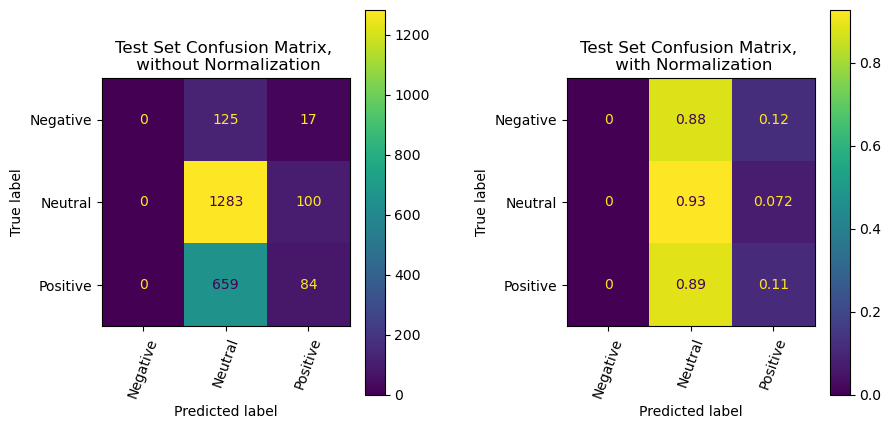

Test Accuracy: 60.27%

Cohen's Kappa Score for Test Set:
0.043

Matthew's Correlation Coefficient for Test Set:
0.062


In [26]:
confmat_and_classrep(T3LRpipelineCV, X_test, y_test_enc, le.classes_, 'Test') 

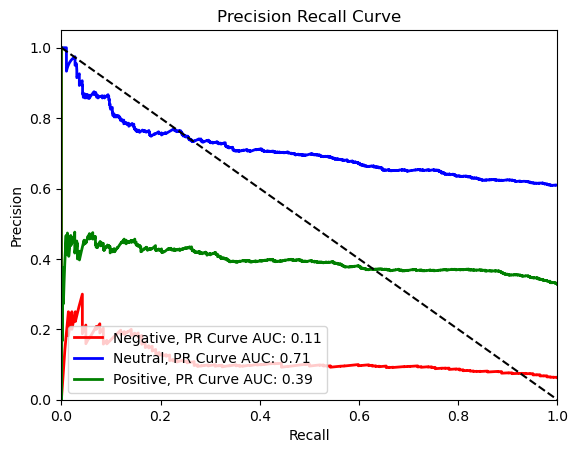

In [27]:
lb.fit(y_test_enc) 
y_test_multi = lb.transform(y_test_enc) 
y_hat_test_multi = T3LRpipelineCV.predict_proba(X_test) 
pr_curves(y_test_multi, y_hat_test_multi, le.classes_) 

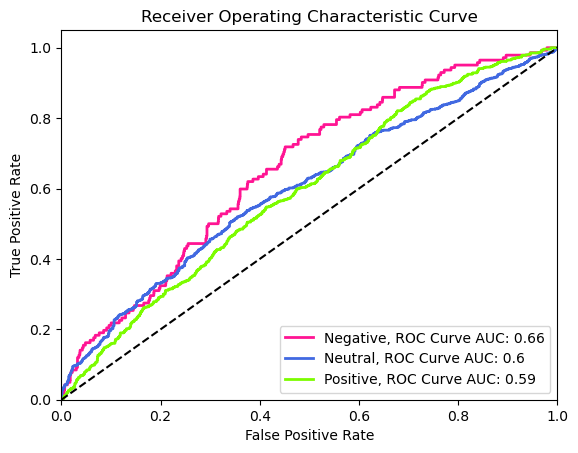

In [28]:
roc_curves(y_test_multi, y_hat_test_multi, le.classes_) 

### Model 6 - Class Weight = Balanced; C = 0.5

In [29]:
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test) 

T5LRpipelineCV = Pipeline([
    ('BOW', CountVectorizer(preprocessor = passing_final, tokenizer = passing_final)), 
    ('Classifier', LogisticRegression(C = 0.5, class_weight = 'balanced')), 
]) 

T5LRpipelineCV.fit(X_train, y_train_enc)

Pipeline(steps=[('BOW',
                 CountVectorizer(preprocessor=<function passing_final at 0x15e397f60>,
                                 tokenizer=<function passing_final at 0x15e397f60>)),
                ('Classifier',
                 LogisticRegression(C=0.5, class_weight='balanced'))])

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.11      0.53      0.19       427
     Neutral       0.71      0.49      0.58      4148
    Positive       0.41      0.37      0.39      2227

    accuracy                           0.45      6802
   macro avg       0.41      0.46      0.38      6802
weighted avg       0.58      0.45      0.49      6802



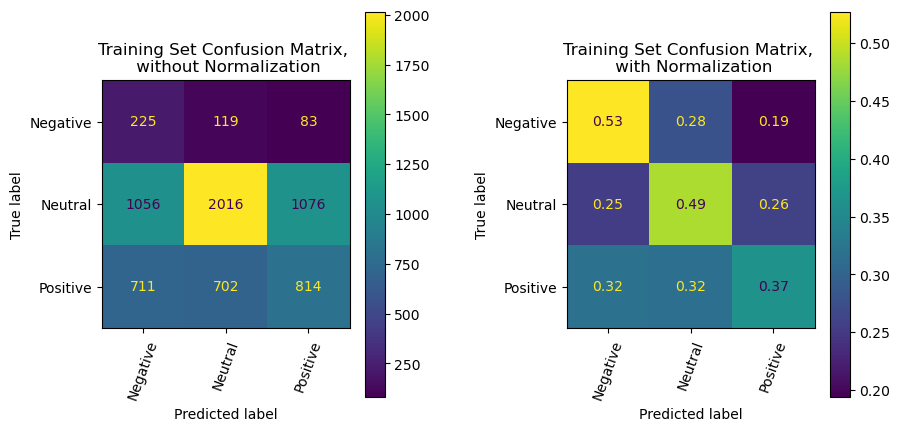

Training Accuracy: 44.91%

Cohen's Kappa Score for Training Set:
0.129

Matthew's Correlation Coefficient for Training Set:
0.14


In [30]:
confmat_and_classrep(T5LRpipelineCV, X_train, y_train_enc, le.classes_, 'Training')

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.11      0.49      0.17       142
     Neutral       0.69      0.45      0.55      1383
    Positive       0.41      0.39      0.40       743

    accuracy                           0.43      2268
   macro avg       0.40      0.44      0.37      2268
weighted avg       0.56      0.43      0.48      2268



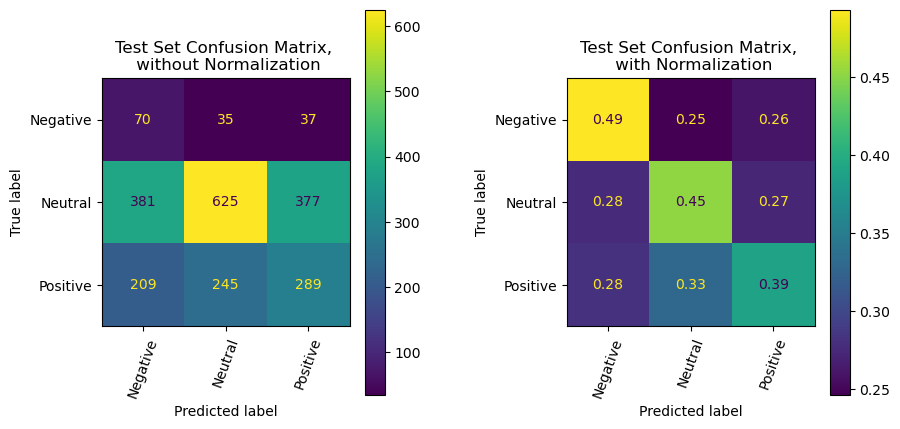

Test Accuracy: 43.39%

Cohen's Kappa Score for Test Set:
0.111

Matthew's Correlation Coefficient for Test Set:
0.121


In [31]:
confmat_and_classrep(T5LRpipelineCV, X_test, y_test_enc, le.classes_, 'Test') 

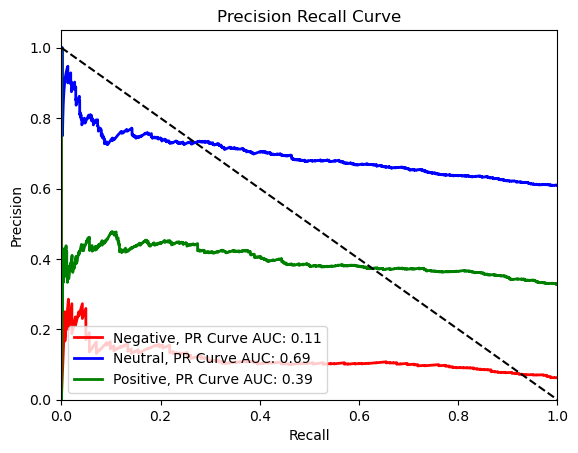

In [32]:
lb.fit(y_test_enc)
y_test_multi = lb.transform(y_test_enc) 
y_hat_test_multi = T5LRpipelineCV.predict_proba(X_test) 
pr_curves(y_test_multi, y_hat_test_multi, le.classes_)

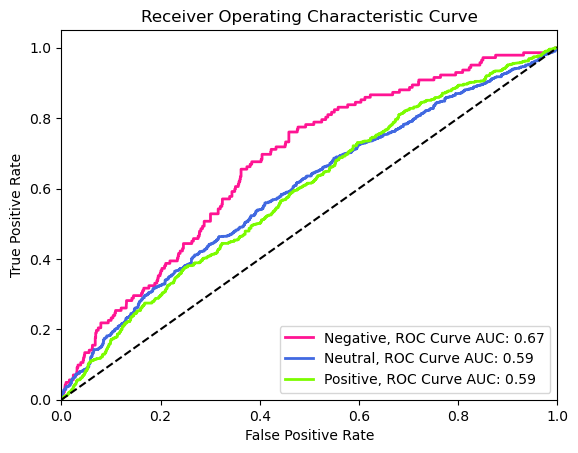

In [33]:
roc_curves(y_test_multi, y_hat_test_multi, le.classes_) 

## Tuning Models Comparison

After comparing the three models based on their test set metrics, Logistic Regression with Count Vectorizer Model 5 (C = 0.5) appears to be the best choice. Here’s why:

* Higher Accuracy: Model 5 achieves the highest accuracy on the test set at 60.27%, which is significantly better than Models 4 and 6, which both reached around 43%. Although accuracy alone is not always a sufficient measure, in this case, it suggests that Model 5 has a better overall prediction rate.

* Performance on Neutral Class: Model 5 performs especially well in identifying the Neutral class, which represents the majority of tweets (with 1383 instances). Its recall for the Neutral class is 0.93, indicating that it can capture most of the neutral tweets effectively. This makes Model 5 useful when prioritizing high accuracy in classifying the neutral tweets, even if it has a lower performance in the minority classes (Negative and Positive).

* Balanced Performance on F1 Score and Weighted Average: Despite lower performance in identifying Negative and Positive tweets, Model 5's F1 score for the Neutral class (0.74) and its overall weighted F1 score (0.51) are higher compared to Models 4 and 6. This balance is essential in ensuring that the model performs acceptably across the majority class, which dominates the dataset.

* Trade-offs in Precision and Recall for Minority Classes: While Model 6 attempts to balance the classes by adjusting weights, it compromises overall accuracy and recall for the Neutral class. Since the dataset has a large imbalance, Model 5’s approach without balancing weights seems more effective in this specific case.

* Lower but Acceptable Kappa and MCC: Although Cohen's Kappa and MCC are low across all models, Model 5 still achieves a reasonable balance without dramatically dropping metrics like accuracy and F1, making it a pragmatic choice for the dataset.